rows: 2226, columns: 14
LR: 0.720787 (0.016292)
LDA: 0.470225 (0.042493)
KNN: 0.941573 (0.018667)
CART: 1.000000 (0.000000)
NB: 0.998315 (0.003597)
SVM: 0.965169 (0.009987)
1.0
[[ 24   0   0   0   0   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0   0   0   0]
 [  0   0  27   0   0   0   0   0   0   0   0]
 [  0   0   0  22   0   0   0   0   0   0   0]
 [  0   0   0   0   8   0   0   0   0   0   0]
 [  0   0   0   0   0  79   0   0   0   0   0]
 [  0   0   0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0   0  61   0   0   0]
 [  0   0   0   0   0   0   0   0  12   0   0]
 [  0   0   0   0   0   0   0   0   0  45   0]
 [  0   0   0   0   0   0   0   0   0   0 160]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00         5
         2.0       1.00      1.00      1.00        27
         3.0       1.00      1.00      1.00        22
         4.0       1.00      1.00 

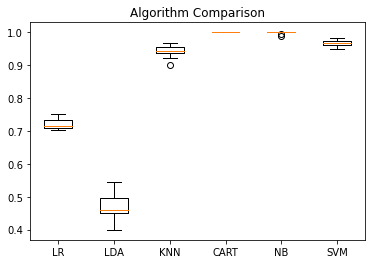

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data split and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# evalutions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset and define features
url = "PIRUS_May2020/PIRUS_Public_May2020.csv"
dataset = pd.read_csv(url)

#filtering attributes and values to select what are needed
plot_consequences = dataset.iloc[:, 6:20]
known_values = np.logical_and(plot_consequences[:] != -99, plot_consequences[:] != -88)
valid = plot_consequences[known_values]

for col in valid:
    valid[col] = valid[col].replace(np.NaN, valid[col].median())
print('rows: %d, columns: %d' % (valid.shape))

# Split-out validation dataset to a 8:2 ratio. 80% for training, 20% for testing
array = valid.values
X = array[:,0:11]
y = array[:,10]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# Spot Check Algorithms - compare different models to pick the best model
# does not need to be included in the final model
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
# plt.show()

# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))